# Episode 1

In [2]:
from astroquery.gaia import Gaia

In [3]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [5]:
for table in tables:
    print(table.name)

external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaiadr1.urat1_best_neighbour
gaiadr1.urat1_neighbourhood
gaiadr1.cepheid
gaiadr1.phot_variable_time_series_gfov
gaiadr1.phot_varia

In [7]:
table_metadata = Gaia.load_table('gaiadr2.gaia_source')
table_metadata

Retrieving table 'gaiadr2.gaia_source'


In [8]:
print(table_metadata)

TAP Table name: gaiadr2.gaiadr2.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 96


## Columns

In [9]:
for column in table_metadata.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_mean_ma

In [11]:
panstarrs_metadata = Gaia.load_table('gaiadr2.panstarrs1_original_valid')
print(panstarrs_metadata)

Retrieving table 'gaiadr2.panstarrs1_original_valid'
TAP Table name: gaiadr2.gaiadr2.panstarrs1_original_valid
Description: The Panoramic Survey Telescope and Rapid Response System (Pan-STARRS) is
a system for wide-field astronomical imaging developed and operated by
the Institute for Astronomy at the University of Hawaii. Pan-STARRS1
(PS1) is the first part of Pan-STARRS to be completed and is the basis
for Data Release 1 (DR1). The PS1 survey used a 1.8 meter telescope and
its 1.4 Gigapixel camera to image the sky in five broadband filters (g,
r, i, z, y).

The current table contains a filtered subsample of the 10 723 304 629
entries listed in the original ObjectThin table.
We used only ObjectThin and MeanObject tables to extract
panstarrs1OriginalValid table, this means that objects detected only in
stack images are not included here. The main reason for us to avoid the
use of objects detected in stack images is that their astrometry is not
as good as the mean objects astrometry: “T

In [15]:
for column in panstarrs_metadata.columns:
    print(column.name)

obj_name
obj_id
ra
dec
ra_error
dec_error
epoch_mean
g_mean_psf_mag
g_mean_psf_mag_error
g_flags
r_mean_psf_mag
r_mean_psf_mag_error
r_flags
i_mean_psf_mag
i_mean_psf_mag_error
i_flags
z_mean_psf_mag
z_mean_psf_mag_error
z_flags
y_mean_psf_mag
y_mean_psf_mag_error
y_flags
n_detections
zone_id
obj_info_flag
quality_flag


## Writing queries

In [16]:
query1 = """SELECT
TOP 10
source_id, ra, dec, parallax
FROM gaiadr2.gaia_source
"""

In [17]:
job1 = Gaia.launch_job(query1)
job1

In [18]:
print(job1)

<Table length=10>
   name    dtype  unit                            description                             n_bad
--------- ------- ---- ------------------------------------------------------------------ -----
source_id   int64      Unique source identifier (unique within a particular Data Release)     0
       ra float64  deg                                                    Right ascension     0
      dec float64  deg                                                        Declination     0
 parallax float64  mas                                                           Parallax     2
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1704507212321O-result.vot.gz
Results: None


In [19]:
results1 = job1.get_results()
type(results1)

astropy.table.table.Table

In [20]:
results1

source_id,ra,dec,parallax
,deg,deg,mas
int64,float64,float64,float64
6003867407926739456,229.24758693475437,-43.16625918475101,0.05337544640744751
6003867476646222720,229.27306373437722,-43.15186079086367,--
6003862593274134272,229.3240572514041,-43.30003699919699,0.2910314419482718
6003859986228465536,227.8416395835098,-41.90818099326277,--
6003875581255862912,229.36961431833257,-43.03090376178989,-0.21654434890941276
6003855794347089280,227.8787501383429,-42.0304574241058,0.5714909134248712
6003880013661767680,229.09787222898308,-43.14185448285732,0.1649270591240445
6003864964096236160,229.38597602489725,-43.19593891106351,-0.10824132246034551


In [22]:
query1_with_rv = """SELECT
TOP 10
source_id, ra, dec, parallax, radial_velocity
FROM gaiadr2.gaia_source
"""
job1_with_rv = Gaia.launch_job(query1_with_rv)
results1_with_rv = job1_with_rv.get_results()
results1_with_rv

source_id,ra,dec,parallax,radial_velocity
,deg,deg,mas,km / s
int64,float64,float64,float64,float64
6003867407926739456,229.24758693475437,-43.16625918475101,0.05337544640744751,--
6003867476646222720,229.27306373437722,-43.15186079086367,--,--
6003862593274134272,229.3240572514041,-43.30003699919699,0.2910314419482718,--
6003859986228465536,227.8416395835098,-41.90818099326277,--,--
6003875581255862912,229.36961431833257,-43.03090376178989,-0.21654434890941276,--
6003855794347089280,227.8787501383429,-42.0304574241058,0.5714909134248712,--
6003880013661767680,229.09787222898308,-43.14185448285732,0.1649270591240445,--
6003864964096236160,229.38597602489725,-43.19593891106351,-0.10824132246034551,--


## Asynchronous queries

In [23]:
query2 = """SELECT
TOP 3000
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax<1
"""

In [24]:
job2 = Gaia.launch_job_async(query2)
job2

INFO: Query finished. [astroquery.utils.tap.core]


In [25]:
results2 = job2.get_results()
results2

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
6003867407926739456,229.24758693475437,-43.16625918475101,-3.9049079044132275,-3.422843525415794,0.05337544640744751
6003862593274134272,229.3240572514041,-43.30003699919699,-0.22955735153158047,-0.9573006030523264,0.2910314419482718
6003875581255862912,229.36961431833257,-43.03090376178989,-1.5247425988530106,-3.753223250404989,-0.21654434890941276
6003855794347089280,227.8787501383429,-42.0304574241058,-6.2945330129631,-7.315154180715561,0.5714909134248712
6003880013661767680,229.09787222898308,-43.14185448285732,-7.7266148254774345,-5.5070759763662265,0.1649270591240445
6003864964096236160,229.38597602489725,-43.19593891106351,-1.8721997950809894,-2.7949125414475304,-0.10824132246034551
...,...,...,...,...,...
4150353655544519936,269.2849119272715,-13.711397572153809,-1.0932530548759516,-1.2971922597796013,0.4472171014058958


## Operators

In [26]:
query2_sol1 = """SELECT
TOP 3000
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax<1
AND bp_rp > -0.75
AND bp_rp < 2
"""

## Formatting queries

In [27]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax'

In [36]:
query3_base = """SELECT
TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
AND bp_rp BETWEEN -0.75 AND 2
"""
query3 = query3_base.format(columns=columns)
print(query3)

SELECT
TOP 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
AND bp_rp BETWEEN -0.75 AND 2



In [33]:
job3 = Gaia.launch_job(query3)
print(job3)

<Table length=10>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
source_id   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1704508096424O-result.vot.gz
Results: None


In [34]:
results3 = job3.get_results()
results3

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
2065082089090515840,313.12681624158984,40.05092031763315,-3.2242749110436146,-4.132582450815744,0.45684978828479644
2065088243777668224,313.5121513411995,40.227075608279016,-5.063663163244739,-9.403133110760631,-0.5592197409374059
2065085529366175104,313.3901839362275,40.09613201386978,-2.099966345614521,-4.871087461621331,0.4400534911794177
2065076591531680384,313.26677275187274,39.90302073735608,-3.544245646313393,-2.3711792021342495,0.31490032447438193
2065081337471402112,313.20712994578065,40.01460239789014,-0.39263205242813104,-7.166757218997961,0.5966854603753338
2065086143548236544,313.47661411877675,40.148362902580295,-0.41201663787059173,-2.604413492834822,-0.36670552470135076
2065084666078677760,313.22671874521285,40.15028941369631,0.711099119310107,-10.516776686097103,-2.823437678959425
2065088067687415168,313.589525290009,40.22609266885227,-1.3014012601534175,-2.019209982487065,-0.2881885100223966


In [37]:
query3_base_sol = """SELECT
TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < {max_parallax}
AND bp_rp BETWEEN -0.75 AND 2
"""
query3_sol = query3_base_sol.format(columns=columns, max_parallax=0.5)
print(query3_sol)

SELECT
TOP 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 0.5
AND bp_rp BETWEEN -0.75 AND 2



# Episode 2: Coordinate Transformations

## Working with Units

* a quantity has two parts: value and units
* astropy enables this

In [38]:
import astropy.units as u

In [39]:
dir(u)

['A',
 'AA',
 'AB',
 'ABflux',
 'ABmag',
 'AU',
 'Angstrom',
 'B',
 'Ba',
 'Barye',
 'Bi',
 'Biot',
 'Bol',
 'Bq',
 'C',
 'Celsius',
 'Ci',
 'CompositeUnit',
 'D',
 'DN',
 'Da',
 'Dalton',
 'Debye',
 'Decibel',
 'DecibelUnit',
 'Dex',
 'DexUnit',
 'EA',
 'EAU',
 'EB',
 'EBa',
 'EC',
 'ED',
 'EF',
 'EG',
 'EGal',
 'EH',
 'EHz',
 'EJ',
 'EJy',
 'EK',
 'EL',
 'EN',
 'EOhm',
 'EP',
 'EPa',
 'ER',
 'ERy',
 'ES',
 'ESt',
 'ET',
 'EV',
 'EW',
 'EWb',
 'Ea',
 'Eadu',
 'Earcmin',
 'Earcsec',
 'Eau',
 'Eb',
 'Ebarn',
 'Ebeam',
 'Ebin',
 'Ebit',
 'Ebyte',
 'Ecd',
 'Echan',
 'Ecount',
 'Ect',
 'Ed',
 'Edeg',
 'Edyn',
 'EeV',
 'Eerg',
 'Eg',
 'Eh',
 'EiB',
 'Eib',
 'Eibit',
 'Eibyte',
 'Ek',
 'El',
 'Elm',
 'Elx',
 'Elyr',
 'Em',
 'Emag',
 'Emin',
 'Emol',
 'Eohm',
 'Epc',
 'Eph',
 'Ephoton',
 'Epix',
 'Epixel',
 'Equivalency',
 'Erad',
 'Es',
 'Esr',
 'Eu',
 'Evox',
 'Evoxel',
 'Eyr',
 'F',
 'Farad',
 'Fr',
 'Franklin',
 'FunctionQuantity',
 'FunctionUnitBase',
 'G',
 'GA',
 'GAU',
 'GB',
 'GBa',


Read documentation 

In [40]:
#multiply by unit
angle = 10*u.degree
type(angle)

astropy.units.quantity.Quantity

In [41]:
angle

<Quantity 10. deg>

In [43]:
#Convert to a different unit
angle_arcmin = angle.to(u.arcmin)
angle_arcmin

<Quantity 600. arcmin>

In [44]:
#Combine quantity objects if it makes sense
angle + 30*u.arcmin

<Quantity 10.5 deg>

In [45]:
angle + 5*u.kg

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

### Exercise:
Create a quantity that represents 5 arcminues and assign it to a variable called `radius`. Then convert it to degrees

In [47]:
radius = 5*u.arcmin
radius.to(u.degree)

<Quantity 0.08333333 deg>

## Selecting a Region

Restrict search to a region of the sky - cone search - 5 arcmin centered on ra=88.8 and dec = 7.4 (both deg and ICRS)

In [48]:
cone_query = """SELECT
TOP 10
source_id
FROM gaiadr2.gaia_source
WHERE 1=CONTAINS(
    POINT(ra, dec),
    CIRCLE(88.8, 7.4, 0.08333333))
"""

In [49]:
cone_job = Gaia.launch_job(cone_query)
cone_job

In [52]:
cone_results = cone_job.get_results()
cone_results

source_id
int64
3322773965056065536
3322773758899157120
3322774068134271104
3322773930696320512
3322774377374425728
3322773724537891456
3322773724537891328
3322773930696321792
3322773724537890944


Exercise: When you are debugging queries like this, you can use `TOP` to lumit the size of the results, but then you still don't know how big the results will be. An alternative is to use `COUNT` which aska for the number of rows that would be selected, but it does not return them. In the previous query, replace `TOP 10 source_id` with `COUNT(source_id)` and run the query again. How many stars in the Gaia catalog are inside the cone we defined?

In [53]:
count_cone_query = """SELECT
COUNT(source_id)
FROM gaiadr2.gaia_source
WHERE 1=CONTAINS(
    POINT(ra, dec),
    CIRCLE(88.8, 7.4, 0.08333333))
"""
count_cone_job = Gaia.launch_job(count_cone_query)
count_cone_results = count_cone_job.get_results()

In [54]:
count_cone_results

COUNT
int64
594


## Getting GD1 Data

* Introduce Fig 1
* axis aligns with stellar stream (phi1 and phi2)
* Full stream runs from phi1 = -100 to 20 degrees and phi2 = -8 to 4 degrees
* Without additional filters, there are over 10 million stars in this field
* Limited to 3 million rows
* For now, we will work with a small subset of phi1 -55 to -45 degrees in phi1 which we can expand later once we have built more filters

## Transforming Coordinates

* Transforming between coordinate systems is a common astronomical task
* Astropy has a library devoted to making this easier for us
* reference frame: Equitorial (ra, dec) to galactic to GD1
* `SkyCoord` object: coordinates and reference frame
* ICRS: International Celestial Reference System
                                                   

In [55]:
from astropy.coordinates import SkyCoord

#Betelguese
ra = 88.8 * u.degree
dec = 7.4 *u.degree
coord_icrs = SkyCoord(ra=ra, dec=dec, frame='icrs')
coord_icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (88.8, 7.4)>

Note we had to supply units and a reference frame

In [56]:
#Switch between reference frames with transform_to

coord_galactic = coord_icrs.transform_to('galactic')
coord_galactic

<SkyCoord (Galactic): (l, b) in deg
    (199.79693102, -8.95591653)>

Note the coordinate names are l and b not ra and dec

You can customize coordinate systems to suit your needs - for instance along the path of motion of a stream in the case of GD1. This wont be defined in astropy, but it can be defined in a custom package. We will use the `gala` package to get the GD1 coordinate system: GD1Koposov10

In [58]:
from gala.coordinates import GD1Koposov10
gd1_frame = GD1Koposov10()
gd1_frame

<GD1Koposov10 Frame>

In [60]:
coord_gd1 = coord_icrs.transform_to(gd1_frame)
coord_gd1

<SkyCoord (GD1Koposov10): (phi1, phi2) in deg
    (-94.97222038, 34.5813813)>

Exercise: Find the location of GD-1 in ICRS coordinates
1. Create a `SkyCoord` object at 0º, 0º in the GD-1 frame
2. Transform it to the ICRS frame

Hint: because ICRS is a standard frame, it is built into astropy. You can specify it by name, `icrs` (as we did with `galactic`)


In [66]:
origin_gd1 = SkyCoord(phi1=0*u.degree, phi2=0*u.degree, frame=gd1_frame)
origin_gd1.transform_to('icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (200., 59.4504341)>

## Selecting a rectangle

* We now want to select all of the stars in GD1
* start with subset
* Define a rectangle in the GD1 reference frame around origin

In [62]:
phi1_min  = -55*u.degree
phi1_max = -45*u.degree
phi2_min = -8*u.degree
phi2_max = 4*u.degree

We are going define a rectangle a lot - so let's write a function
* fix bugs in a single place
* don't have to copy and paste

In [63]:
def make_rectangle(x1, x2, y1, y2):
    """Return the corners of a rectangle."""
    xs = [x1, x1, x2, x2, x1]
    ys = [y1, y2, y2, y1, y1]
    return xs, ys

In [65]:
phi1_rect, phi2_rect = make_rectangle(phi1_min, phi1_max, phi2_min, phi2_max)

* Easier to visualize GD1 in GD1 frame
* Gaia in ICRS frame - so we need to transform these corners into ICRS before we can query Gaia
* SkyCoord can take a list of coordinates

In [68]:
corners = SkyCoord(phi1=phi1_rect, phi2=phi2_rect, frame=gd1_frame)
corners

<SkyCoord (GD1Koposov10): (phi1, phi2) in deg
    [(-55., -8.), (-55.,  4.), (-45.,  4.), (-45., -8.), (-55., -8.)]>

In [69]:
corners_icrs = corners.transform_to('icrs')
corners_icrs

<SkyCoord (ICRS): (ra, dec) in deg
    [(146.27533314, 19.26190982), (135.42163944, 25.87738723),
     (141.60264825, 34.3048303 ), (152.81671045, 27.13611254),
     (146.27533314, 19.26190982)]>

## Defining a Polygon

While SkyCoord takes a list of RA and DEC, ADQL's polygon function takes string of comma separated coordinates

In [74]:
#Use SkyCoord to_string function
corners_list_str = corners_icrs.to_string()
corners_list_str

['146.275 19.2619',
 '135.422 25.8774',
 '141.603 34.3048',
 '152.817 27.1361',
 '146.275 19.2619']

In [76]:
corners_single_str = ' '.join(corners_list_str)
corners_single_str

'146.275 19.2619 135.422 25.8774 141.603 34.3048 152.817 27.1361 146.275 19.2619'

In [77]:
corners_single_str.replace(' ', ', ')

'146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619'

Again, we will do this multiple times, we we will write a function

In [79]:
def skycoord_to_string(skycoord):
    """Convert a one-dimensional list of SkyCoord to string for Gaia's query format."""
    corners_list_str = skycoord.to_string()
    corners_single_str = ' '.join(corners_list_str)
    return corners_single_str.replace(' ', ', ')

In [80]:
sky_point_list = skycoord_to_string(corners_icrs)
sky_point_list

'146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619'

## Assemblying the query

In [81]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax'

In [82]:
#Modify query3 from earlier
query3_base = """SELECT
TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
    AND bp_rp BETWEEN -0.75 AND 2
"""

In [84]:
#Add polygon to where statement
polygon_top10query_base = """SELECT
TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
    AND bp_rp BETWEEN -0.75 and 2
    AND 1 = CONTAINS(POINT(ra, dec),
                     POLYGON({sky_point_list}))
"""

In [85]:
polygon_top10query = polygon_top10query_base.format(columns=columns, sky_point_list=sky_point_list)
print(polygon_top10query)

SELECT
TOP 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
    AND bp_rp BETWEEN -0.75 and 2
    AND 1 = CONTAINS(POINT(ra, dec),
                     POLYGON(146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619))



Take a minute to proofread

In [86]:
polygon_top10query_job = Gaia.launch_job_async(polygon_top10query)
print(polygon_top10query_job)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=10>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
source_id   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax
Jobid: 1704512204124O
Phase: COMPLETED
Owner: None
Output file: async_20240105213644.vot
Results: None


In [87]:
polygon_top10_query_results = polygon_top10query_job.get_results()
polygon_top10_query_results

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354
638285195917112960,142.25452941346344,22.476168171141378,2.6627020143457996,-12.165984395577347,0.4227283465319491
638073505568978688,142.64528557468074,22.16693224953078,18.30674739454163,-7.950659620550862,0.10363972229362585
638086386175786752,142.57739430926034,22.22791951401365,0.9877856720147953,-2.584105480335548,-0.8573270355079308
638049655615392384,142.58913564478618,22.110783166677418,0.24443878227817095,-4.941079187010136,0.099624729200593
638267565075964032,141.81762228999614,22.375696125322275,-3.413174589660796,1.8838892877285924,-0.07271215219283075
638028902333511168,143.18339801317677,22.2512465812369,7.848511762712128,-21.391145547787154,0.28736226011479443
638085767700610432,142.9347319464589,22.46244080823965,-3.6585960944321476,-12.486419770278376,-0.9896728393047383


In [92]:
#Remove `TOP 10` now that we know it works
polygon_query_base = """SELECT
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
    AND bp_rp BETWEEN -0.75 and 2
    AND 1 = CONTAINS(POINT(ra, dec),
                     POLYGON({sky_point_list}))
"""

In [93]:
polygon_query = polygon_query_base.format(columns=columns, sky_point_list=sky_point_list)
print(polygon_query)

SELECT
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
    AND bp_rp BETWEEN -0.75 and 2
    AND 1 = CONTAINS(POINT(ra, dec),
                     POLYGON(146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619))



In [94]:
polygon_job = Gaia.launch_job_async(polygon_query)
print(polygon_job)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=140339>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
source_id   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax
Jobid: 1704512395373O
Phase: COMPLETED
Owner: None
Output file: async_20240105213955.vot
Results: None


In [95]:
polygon_results = polygon_job.get_results()
len(polygon_results)

140339

## Saving results

* We have a substantail dataset that we will use in future --> save it
* Can pick up where we left of (e.g. shut down notebook) without having to do query over again

In [96]:
# Use write in astropy table
filename = 'gd1_results.fits'
polygon_results.write(filename, overwrite=True)

auto-format .fits fits fule default

In [97]:
#Use getsize to check that file exists

In [98]:
from os.path import getsize
MB = 1024*1024
getsize(filename)/MB

6.4324951171875

## Key Points

* Use quantity to represent units explicity and check for errors
* Use format to compose queries: faster, less error prone
* Develop queries incrementally
* Save data once you have a working query

# Episode 3: Plotting and Tabular Data

In [99]:
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
source_id   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax


In [101]:
polygon_results.colnames

['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax']

In [103]:
len(polygon_results['ra'])

140339

In [114]:
type(polygon_results['ra'])

astropy.table.column.MaskedColumn

In [116]:
polygon_results[0]

source_id,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354


In [117]:
type(polygon_results[0])

astropy.table.row.Row

In [118]:
polygon_results['ra'][0]

142.48301935991023

In [119]:
polygon_results[0]['ra']

142.48301935991023

## Scatter Plot

In [120]:
import matplotlib.pyplot as plt

In [121]:
%matplotlib inline

Text(0, 0.5, 'dec (degree ICRS)')

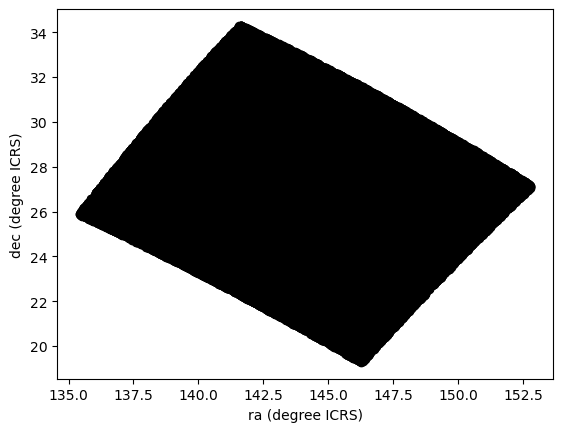

In [123]:
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x,y, 'ko')

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

Text(0, 0.5, 'dec (degree ICRS)')

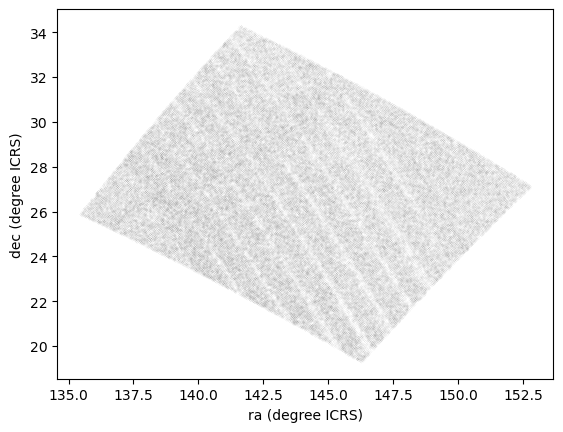

In [125]:
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x,y, 'ko', markersize=0.1, alpha=0.1)

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

## Transform back

In [126]:
skycoord = SkyCoord(ra=polygon_results['ra'], dec=polygon_results['dec'])

In [127]:
distance = 8*u.kpc
radial_velocity = 0*u.km/u.s

skycoord = SkyCoord(ra=polygon_results['ra'], 
                    dec=polygon_results['dec'], 
                    pm_ra_cosdec=polygon_results['pmra'],
                    pm_dec = polygon_results['pmdec'],
                    distance=distance,
                    radial_velocity=radial_velocity)

In [128]:
transformed = skycoord.transform_to(gd1_frame)

## Reflex Correction

In [129]:
from gala.coordinates import reflex_correct
skycoord_gd1 = reflex_correct(transformed)

Text(0, 0.5, 'phi2 (degree GD1)')

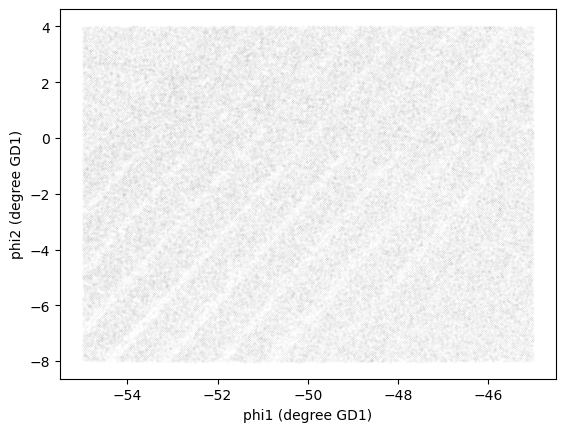

In [130]:
x = skycoord_gd1.phi1
y = skycoord_gd1.phi2
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)
plt.xlabel('phi1 (degree GD1)')
plt.ylabel('phi2 (degree GD1)')

## Pandas DataFrame

In [131]:
type(polygon_results)

astropy.table.table.Table

In [132]:
type(skycoord_gd1)

astropy.coordinates.sky_coordinate.SkyCoord

In [133]:
polygon_results['phi1'] = skycoord_gd1.phi1
polygon_results['phi2'] = skycoord_gd1.phi2
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                                class    
--------- ------- -------- ------------------------------------------------------------------ ------------
source_id   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn
       ra float64      deg                                                    Right ascension MaskedColumn
      dec float64      deg                                                        Declination MaskedColumn
     pmra float64 mas / yr                         Proper motion in right ascension direction MaskedColumn
    pmdec float64 mas / yr                             Proper motion in declination direction MaskedColumn
 parallax float64      mas                                                           Parallax MaskedColumn
     phi1 float64      deg                                                                          Column
     phi2 float

In [134]:
polygon_results['pm_phi1'] = skycoord_gd1.pm_phi1_cosphi2
polygon_results['pm_phi2'] = skycoord_gd1.pm_phi2
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                                class    
--------- ------- -------- ------------------------------------------------------------------ ------------
source_id   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn
       ra float64      deg                                                    Right ascension MaskedColumn
      dec float64      deg                                                        Declination MaskedColumn
     pmra float64 mas / yr                         Proper motion in right ascension direction MaskedColumn
    pmdec float64 mas / yr                             Proper motion in declination direction MaskedColumn
 parallax float64      mas                                                           Parallax MaskedColumn
     phi1 float64      deg                                                                          Column
     phi2 float

## Pandas DataFrames versus Astropy Tables

In [135]:
import pandas as pd

results_df = polygon_results.to_pandas()

In [136]:
results_df.shape

(140339, 10)

In [137]:
results_df.head()

,source_id,ra,dec,pmra,pmdec,parallax,phi1,phi2,pm_phi1,pm_phi2
0,637987125186749568,142.483019,21.757716,-2.516838,2.941813,-0.257345,-54.975623,-3.659349,6.429945,6.518157
1,638285195917112960,142.254529,22.476168,2.662702,-12.165984,0.422728,-54.498247,-3.081524,-3.168637,-6.206795
2,638073505568978688,142.645286,22.166932,18.306747,-7.950660,0.103640,-54.551634,-3.554229,9.129447,-16.819570
3,638086386175786752,142.577394,22.227920,0.987786,-2.584105,-0.857327,-54.536457,-3.467966,3.837120,0.526461
4,638049655615392384,142.589136,22.110783,0.244439,-4.941079,0.099625,-54.627448,-3.542738,1.466103,-0.185292


In [139]:
def make_dataframe(table):
    """Transform coordinates from ICRS to GD-1 frame.

    table: Astropy Table

    returns: Pandas DataFrame
    """
    #Create a SkyCoord object with the coordinates and proper motinos
    # in the input table
    skycoord = SkyCoord(
                ra=table['ra'],
                dec=table['dec'],
                pm_ra_cosdec=table['pmra'],
                pm_dec = table['pmdec'],
                distance=8*u.kpc,
                radial_velocity=0*u.km/u.s)
    #Define the GD-1 reference frame
    gd1_frame = GD1Koposov10()

    #Transform input coordinates to the GD-1 reference frame
    transformed = skycoord.transform_to(gd1_frame)

    #Correct GD-1 coordinates for solar system motion around galactic center
    skycoord_gd1 = reflex_correct(transformed)

    #Add GD-1 reference frame columns for coordinates and proper motions
    table['phi1'] = skycoord_gd1.phi1
    table['phi2'] = skycoord_gd1.phi2
    table['pm_phi1'] = skycoord_gd1.pm_phi1_cosphi2
    table['pm_phi2'] = skycoord_gd1.pm_phi2

    #Create DataFrame
    df = table.to_pandas()

    return df

In [140]:
results_df = make_dataframe(polygon_results)

## Saving the DataFrame

In [142]:
from astropy.table import Table
results_table = Table.from_pandas(results_df)
type(results_table)

astropy.table.table.Table

In [143]:
filename = 'gd1_data.hdf'
results_df.to_hdf(filename, 'results_df', mode='w')

# Episode 4: Plotting and Pandas

## Exploring Data

Pandas contains functions for exploring data

In [144]:
results_df.describe()

,source_id,ra,dec,pmra,pmdec,parallax,phi1,phi2,pm_phi1,pm_phi2
count,1.403390e+05,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000
mean,6.792399e+17,143.823122,26.780285,-2.484404,-6.100777,0.179492,-50.091158,-1.803301,-0.868963,1.409208
std,3.792177e+16,3.697850,3.052592,5.913939,7.202047,0.759590,2.892344,3.444398,6.657714,6.518615
min,6.214900e+17,135.425699,19.286617,-106.755260,-138.065163,-15.287602,-54.999989,-8.029159,-115.275637,-161.150142
25%,6.443517e+17,140.967966,24.592490,-5.038789,-8.341561,-0.035981,-52.602952,-4.750426,-2.948723,-1.107128
50%,6.888060e+17,143.734409,26.746261,-1.834943,-4.689596,0.362708,-50.147362,-1.671502,0.585037,1.987149
75%,6.976579e+17,146.607350,28.990500,0.452893,-1.937809,0.657637,-47.593279,1.160514,3.001768,4.628965
max,7.974418e+17,152.777393,34.285481,104.319923,20.981070,0.999957,-44.999985,4.014609,39.802471,79.275199


Exercise: Review the summary statistcs in this table.
* Do the values make sense based on what you know about the context?
* Do you see any values taht seem problematic, or evidence of other data issues?

Solution:  
* some parallax are negative (source confusion or systematic errors)
* we don't use parallax - just constant distance

## Plot proper motion

* We are ready to replicate on of the figures
* Shaded region = GD-1 - we expect systematic offset proper motion because all in the same direction in the GD-1 frame (in phi 1)
* We don't know anything about the proper motion of GD-1 but we hope to find a cluster
* Then we will use this cluster to isolate GD-1 stars

Text(0, 0.5, 'Proper motion phi2 (mas/yr GD1 frame)')

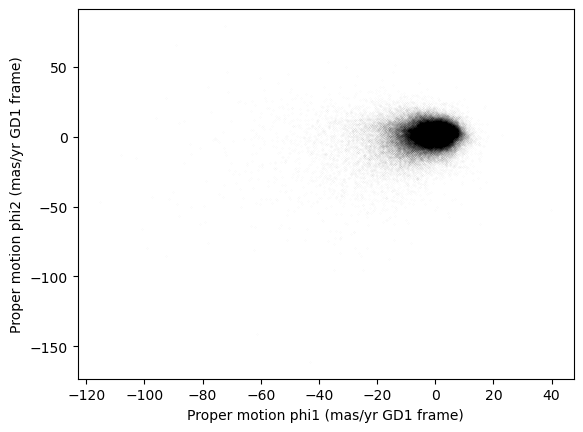

In [145]:
x = results_df['pm_phi1']
y = results_df['pm_phi2']
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)

plt.xlabel('Proper motion phi1 (mas/yr GD1 frame)')
plt.ylabel('Proper motion phi2 (mas/yr GD1 frame)')

Zoom in on cluster near 0

(-10.0, 10.0)

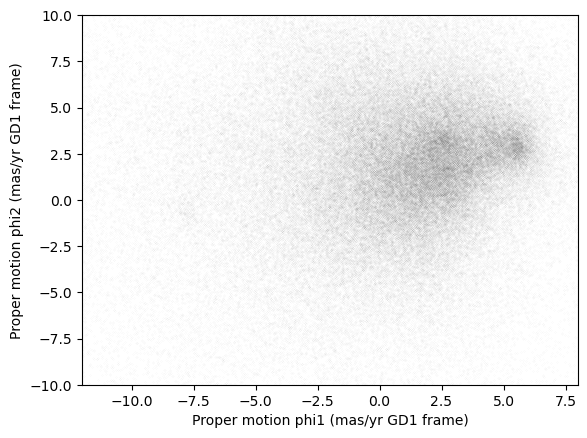

In [146]:
x = results_df['pm_phi1']
y = results_df['pm_phi2']
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)

plt.xlabel('Proper motion phi1 (mas/yr GD1 frame)')
plt.ylabel('Proper motion phi2 (mas/yr GD1 frame)')

plt.xlim(-12, 8)
plt.ylim(-10, 10)

Possibly an over density near -7.5 but we need a high density of GD1 stars. So we will zoom in in phi2 to the center line of GD-1

In [150]:
phi2 = results_df['phi2']
type(phi2)

pandas.core.series.Series

In [152]:
phi2_min = -1.0*u.degree
phi2_max = 1*u.degree
mask = (phi2 > phi2_min)
type(mask)

pandas.core.series.Series

In [153]:
mask.head()

0    False
1    False
2    False
3    False
4    False
Name: phi2, dtype: bool

Use the logical and &

In [154]:
mask = (phi2 > phi2_min) & (phi2 < phi2_max)

have to use bitwise operators with numpy and pandas

In [155]:
mask.sum()

25084

In [156]:
len(phi2)

140339

In [157]:
centerline_df = results_df[mask]
type(centerline_df)

pandas.core.frame.DataFrame

In [158]:
len(centerline_df)

25084

In [159]:
#Fraction we selected
len(centerline_df)/len(results_df)

0.1787386257562046

## Plot proper motion

This is the second time we want to plot proper motion - maybe we should make a function

In [172]:
def plot_proper_motion(df):
    x = df['pm_phi1']
    y = df['pm_phi2']
    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)
    
    plt.xlabel('Proper motion phi1 (mas/yr GD1 frame)')
    plt.ylabel('Proper motion phi2 (mas/yr GD1 frame)')
    
    plt.xlim(-12, 8)
    plt.ylim(-10, 10)

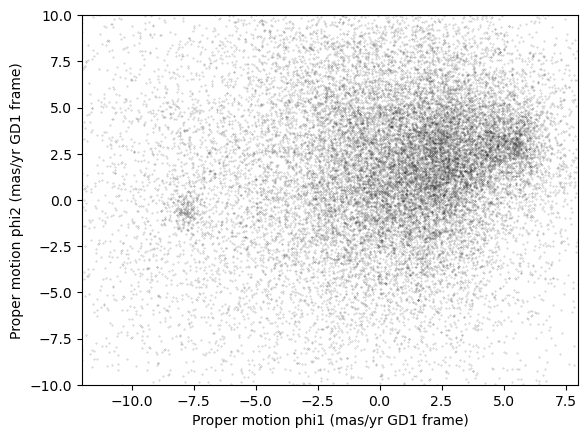

In [173]:
plot_proper_motion(centerline_df)

* Can see over density
* less dense than paper because we aren't using full stream (we will do that next)

## Filtering based on proper motion

* select stars in overdense region
* Use a simple rectangle for now

In [175]:
#by eye
pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max = 1.0

In [178]:
pm1_rect, pm2_rect = make_rectangle(pm1_min, pm1_max, pm2_min, pm2_max)

Let's check the region we just defined

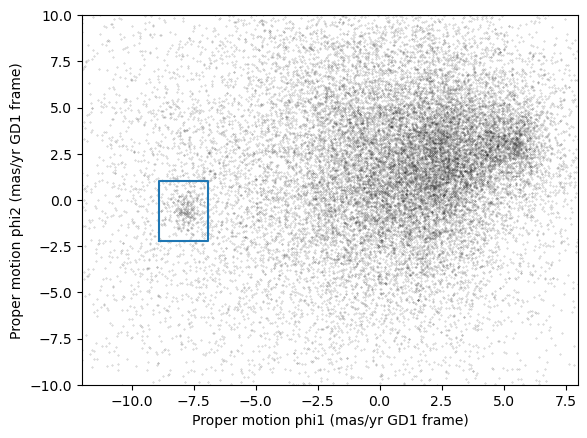

In [180]:
plot_proper_motion(centerline_df)
plt.plot(pm1_rect, pm2_rect, '-')

In [181]:
#define a between function to create mask
def between(series, low, high):
    """Check whether values are bwteeen `low` and `high`. """
    return (series > low) & (series < high)

In [183]:
pm1 = results_df['pm_phi1']
pm2 = results_df['pm_phi2']

pm_mask = (between(pm1, pm1_min, pm1_max) & 
           between(pm2, pm2_min, pm2_max))

In [184]:
pm_mask.sum()

1049

In [186]:
#Create a DataFrame with proper motion filter
selected_df = results_df[pm_mask]
len(selected_df)

1049

Let's check to see how our tidal stream is looking

Text(0, 0.5, 'phi2 (degree GD1)')

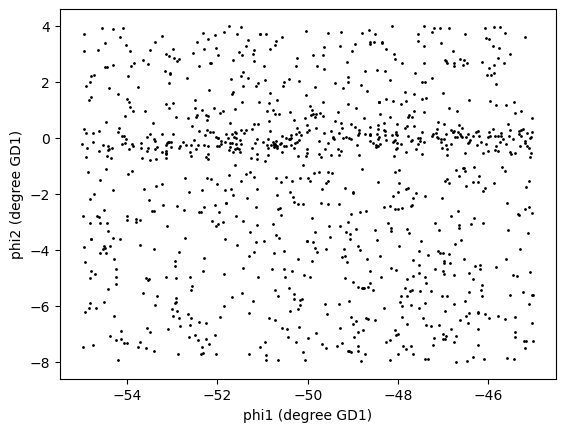

In [187]:
x = selected_df['phi1']
y = selected_df['phi2']
plt.plot(x, y, 'ko', markersize=1, alpha=1)

plt.xlabel('phi1 (degree GD1)')
plt.ylabel('phi2 (degree GD1)')

Final matplotlib cleanup:
* axis equal - same unit size in x and y
* title: add title to plot
* fontsize='medium' set title fontsize

(-55.492803213090355,
 -44.503699550734694,
 -8.606246809552188,
 4.601299340488259)

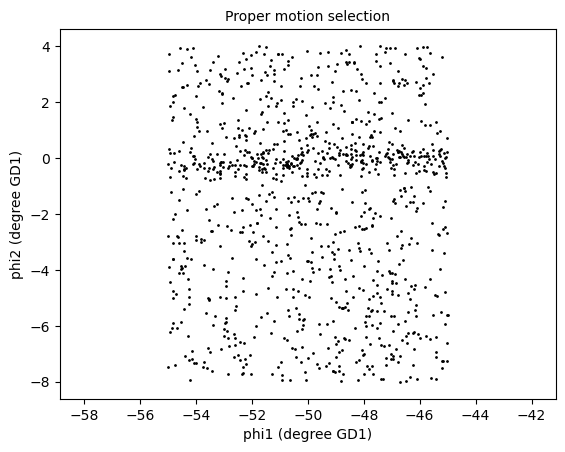

In [188]:
x = selected_df['phi1']
y = selected_df['phi2']
plt.plot(x, y, 'ko', markersize=1, alpha=1)

plt.xlabel('phi1 (degree GD1)')
plt.ylabel('phi2 (degree GD1)')

plt.title('Proper motion selection', fontsize='medium')
plt.axis('equal')

Put code to make this panel in a function for later

In [189]:
def plot_pm_selection(df):
    """Plot in GD-1 spatial coordinates the location of the stars 
    selected by proper motion
    """
    x = df['phi1']
    y = df['phi2']
    plt.plot(x, y, 'ko', markersize=1, alpha=1)
    
    plt.xlabel('phi1 (degree GD1)')
    plt.ylabel('phi2 (degree GD1)')
    
    plt.title('Proper motion selection', fontsize='medium')
    plt.axis('equal')

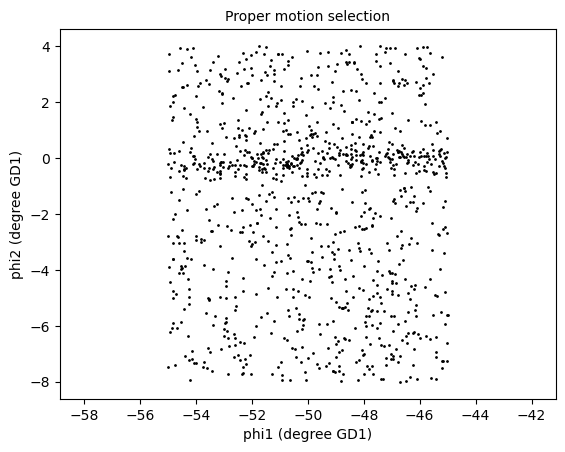

In [190]:
plot_pm_selection(selected_df)

## Saving the DataFrame

* Save our cleaned results (this is the culmination of a lot of work and a usable result)
* HDF can stor more than one dataset and associated metadata (like fits)

In [191]:
filename = 'gd1_data.hdf'

#omit mode='w' to add a new dataset
selected_df.to_hdf(filename, 'selected_df')

* selected_df is the key we will use to identify this dataset (as opposed to any other dataset we've written to the file

Exercise: We are going to need `centerline_df` later as well. Write a line of code to add it as a second Dataset in the HDF5 file. 
Hint: since the file already exists, you should *not* use the mode='w'.

In [193]:
centerline_df.to_hdf(filename, 'centerline_df')

In [194]:
from os.path import getsize
MB=1024*1024
getsize(filename)/MB

13.992530822753906

To get the keys in a given file:

In [195]:
with pd.HDFStore(filename) as hdf:
    print(hdf.keys())

['/centerline_df', '/results_df', '/selected_df']


Note: with automatically closes the file

## Key Points
* Pandas for statistcal inspection
* prototype workflow on a small set of data to explore and identify ways to limit dataset
* store data in HDF5 files